In [2]:
import xarray as xr
import zarr
import dask
import icechunk
from icechunk import IcechunkStore, StorageConfig

from gcsfs import GCSFileSystem
from zarr.storage.logging import LoggingStore
from zarr.storage import RemoteStore

print('xarray:  ', xr.__version__)
print('dask:    ', dask.__version__)
print('zarr:    ', zarr.__version__)
print('icechunk:', icechunk.__version__)

# pip install git+https://github.com/TomAugspurger/zarr-python@xarray-compat git+https://github.com/TomAugspurger/xarray/@fix/zarr-v3 git+https://github.com/jhamman/dask@fix/zarr-array-construction-2

xarray:   0.9.7.dev3697+g9b3c2885
dask:     0+untagged.8339.gc0f671e
zarr:     3.0.0
icechunk: 0.1.0-alpha.1


In [3]:
s3_storage = StorageConfig.s3_from_env(
    bucket="icechunk-test", prefix="xarray-demo-repository"
)

In [4]:
store = await IcechunkStore.open_existing(
    storage=s3_storage,
    mode="r+",
)

In [5]:
ds = xr.tutorial.load_dataset('tiny')

In [6]:
ds.to_zarr(store, zarr_version=3, consolidated=False, mode='a', group='tiny')

/var/folders/6_/834w1yzj49d6t6dz8lpx86fm0000gn/T/ipykernel_83223/3876451927.py:1: FutureWarning: zarr_version is deprecated, use zarr_format
  ds.to_zarr(store, zarr_version=3, consolidated=False, mode='a', group='tiny')


In [7]:
await store.commit('added tiny')

'9352KQMQSZ1BRPQ9M010'

In [8]:
xr.open_zarr(store, zarr_version=3, group='tiny', consolidated=False)

/Users/jhamman/miniforge3/envs/icechunk-demo/lib/python3.12/site-packages/xarray/backends/zarr.py:1243: FutureWarning: zarr_version is deprecated, use zarr_format
  ds = open_dataset(


<xarray.Dataset> Size: 40B
Dimensions:  (dim_0: 5)
Dimensions without coordinates: dim_0
Data variables:
    tiny     (dim_0) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>

In [9]:
ds = xr.tutorial.open_dataset('rasm')

In [10]:
ds.to_zarr(store, zarr_version=3, consolidated=False, mode='a', group='rasm')

/var/folders/6_/834w1yzj49d6t6dz8lpx86fm0000gn/T/ipykernel_83223/1348469363.py:1: FutureWarning: zarr_version is deprecated, use zarr_format
  ds.to_zarr(store, zarr_version=3, consolidated=False, mode='a', group='rasm')


In [11]:
await store.commit('added rasm')

'MV5H6BZZV5YJ24992040'

In [12]:
ds = xr.open_zarr(store, zarr_version=3, consolidated=False, group='rasm', chunks='auto')

/Users/jhamman/miniforge3/envs/icechunk-demo/lib/python3.12/site-packages/xarray/backends/zarr.py:1243: FutureWarning: zarr_version is deprecated, use zarr_format
  ds = open_dataset(


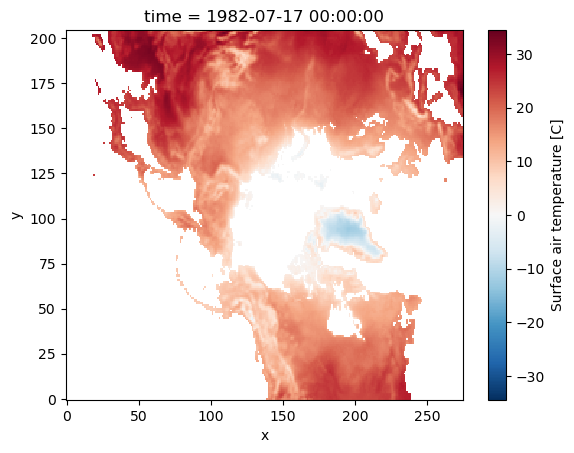

In [13]:
ds['Tair'].isel(time=22).plot()

In [14]:
fs = GCSFileSystem(asynchronous=True)
source = RemoteStore(fs, path="noaa-ufs-gefsv13replay/ufs-hr1/1.00-degree/03h-freq/zarr/fv3.zarr")

In [16]:
ds = xr.open_zarr(source, zarr_version=2, chunks={}, consolidated=True)
ds

<xarray.Dataset> Size: 11TB
Dimensions:        (time: 15916, grid_yt: 192, grid_xt: 384, pfull: 127)
Coordinates:
    cftime         (time) object 127kB dask.array<chunksize=(15916,), meta=np.ndarray>
    ftime          (time) timedelta64[ns] 127kB dask.array<chunksize=(15916,), meta=np.ndarray>
  * grid_xt        (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt        (grid_yt) float64 2kB 89.28 88.36 87.42 ... -88.36 -89.28
  * pfull          (pfull) float32 508B 0.01278 0.02033 0.03177 ... 996.2 998.8
  * time           (time) datetime64[ns] 127kB 1993-12-31T18:00:00 ... 1999-0...
Data variables: (12/182)
    acond          (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    albdo_ave      (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnsf          (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnwf          (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvsf          (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvwf          (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...             ...
    xtts           (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xu             (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xv             (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xz             (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xzts           (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    zc             (time, grid_yt, grid_xt) float32 5GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [18]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    # this works but is slow
    # try tomorrow wired in or from the hub
    # and set encoding for the output
    ds.drop_encoding().isel(time=slice(0, 2)).to_zarr(store, zarr_format=3, consolidated=False, mode='a', group='ufs')

[########################################] | 100% Completed | 100.71 ms
[########################################] | 100% Completed | 31.09 s


In [19]:
await store.commit('add ufs sample 🤯')

'3E0EHZ9C5KHXRGVM5R6G'